In [9]:
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Explore unfiltered data from Prolific

In [10]:
df = pd.read_pickle("1_merged_prolific_data.pickle")
filter_df = pd.read_pickle("2_merged_prolific_data_filtered.pickle")

Add some statistics and other columns

In [11]:
df['nr_clicks'] = [len(points) for points in df['points_clicked']]
filter_df['nr_clicks'] = [len(points) for points in filter_df['points_clicked']]

In [12]:
filter_df.head(1)

,instance_id,mask,points_clicked,filename,answer,time_to_submit,prolific_session_id,prolific_user_id,nr_clicks,caption,foil,linguistic_phenomena,Approval,clip_pred_diff,img_path
0,20240209102845833682,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...","[(177.5, 226), (65.5, 275), (67.5, 283), (367....",000000057027.jpg,caption,76.445115,65c5fe51fd295062720c7d34,600c27a4685f792d0bca05ae,6,A baby elephant walks with an older elephant,A baby elephant walks past an older elephant,relations,Approve,0.524429,../VALSE_data/images/coco2017/000000057027.jpg


### Graphing

Number of clicks and time to submit

FULL dataset

/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_93766/830672387.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


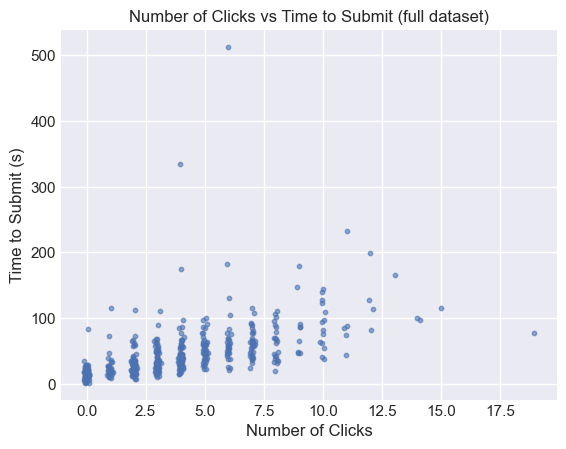

In [13]:
plt.style.use('seaborn-darkgrid')

# add a small random displacement to 'nr_clicks' to improve visibility
displacement = 0.05 * np.random.randn(len(df))
adjusted_nr_clicks = df['nr_clicks'] + displacement

# Creating the scatterplot with smaller points
plt.scatter(adjusted_nr_clicks, df['time_to_submit'], s=10, alpha=0.6)

plt.xlabel('Number of Clicks')
plt.ylabel('Time to Submit (s)')
plt.title('Number of Clicks vs Time to Submit (full dataset)')

plt.show()

FILTERED dataset

/var/folders/3l/2lt99jp97mvbvsj3_p5hh8f80000gn/T/ipykernel_93766/193155512.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


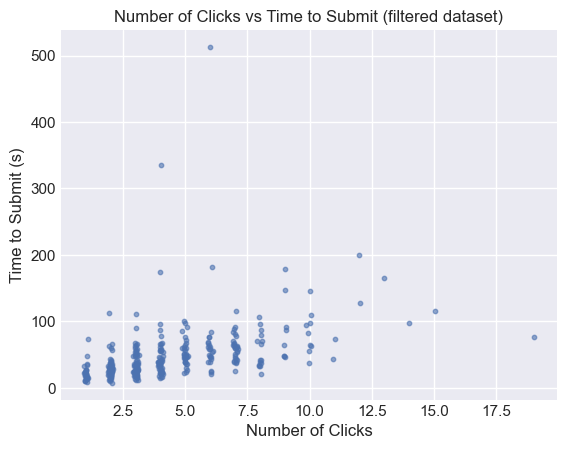

In [14]:
plt.style.use('seaborn-darkgrid')

# add a small random displacement to 'nr_clicks' to improve visibility
displacement = 0.05 * np.random.randn(len(filter_df))
adjusted_nr_clicks = filter_df['nr_clicks'] + displacement

# Creating the scatterplot with smaller points
plt.scatter(adjusted_nr_clicks, filter_df['time_to_submit'], s=10, alpha=0.6)

plt.xlabel('Number of Clicks')
plt.ylabel('Time to Submit (s)')
plt.title('Number of Clicks vs Time to Submit (filtered dataset)')

plt.show()

Distribution of average clicks per user -- FULL dataset

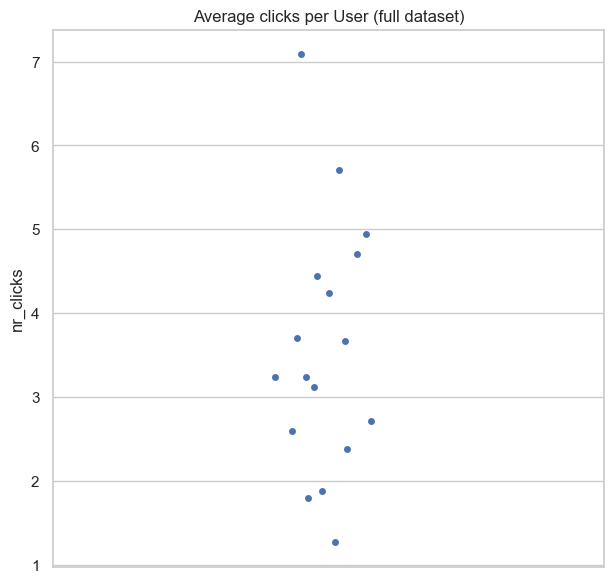

In [15]:
import seaborn as sns

avg_clicks_per_user = df.groupby('prolific_user_id')['nr_clicks'].mean()
sns.set_theme(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Strip plot
plt.subplot(1, 2, 2)
sns.stripplot(y=avg_clicks_per_user, jitter=True)
plt.title('Average clicks per User (full dataset)')

plt.tight_layout()
plt.show()

Distribution of average clicks per user -- FILTERED dataset

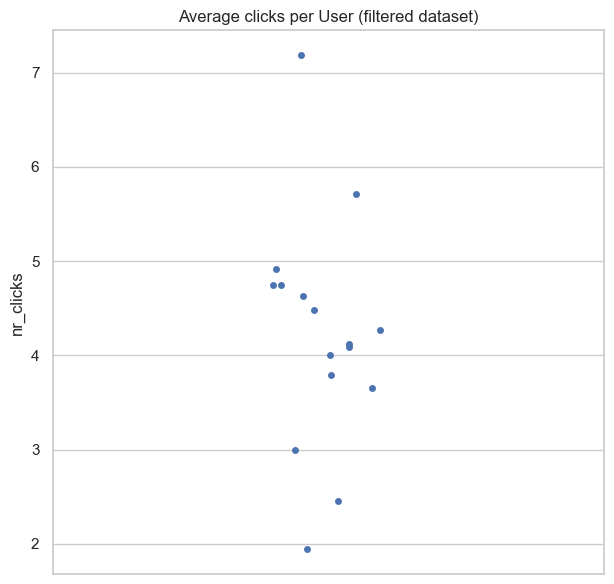

In [16]:
import seaborn as sns

avg_clicks_per_user = filter_df.groupby('prolific_user_id')['nr_clicks'].mean()
sns.set_theme(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Strip plot
plt.subplot(1, 2, 2)
sns.stripplot(y=avg_clicks_per_user, jitter=True)
plt.title('Average clicks per User (filtered dataset)')

plt.tight_layout()
plt.show()

### Approve/Reject and performance